In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [8]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurements.date).order_by(Measurements.date.desc()).first()
previous_date = '2016-08-23'
# Perform a query to retrieve the data and precipitation scores
precipitation_scores = session.query(Measurements.date,Measurements.prcp).\
filter(Measurements.date >= previous_date).order_by(Measurements.date).all()
precipitation_scores
# Save the query results as a Pandas DataFrame and set the index to the date column
results = pd.DataFrame(precipitation_scores, columns = ["Date", "Precipitation"])
results
# Sort the dataframe by date
results = results.dropna()
results.set_index('Date', inplace = True)
results = results.sort_values(by = 'Date')
results



,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.08


(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000., 2250.]),
 <a list of 11 Text major ticklabel objects>)

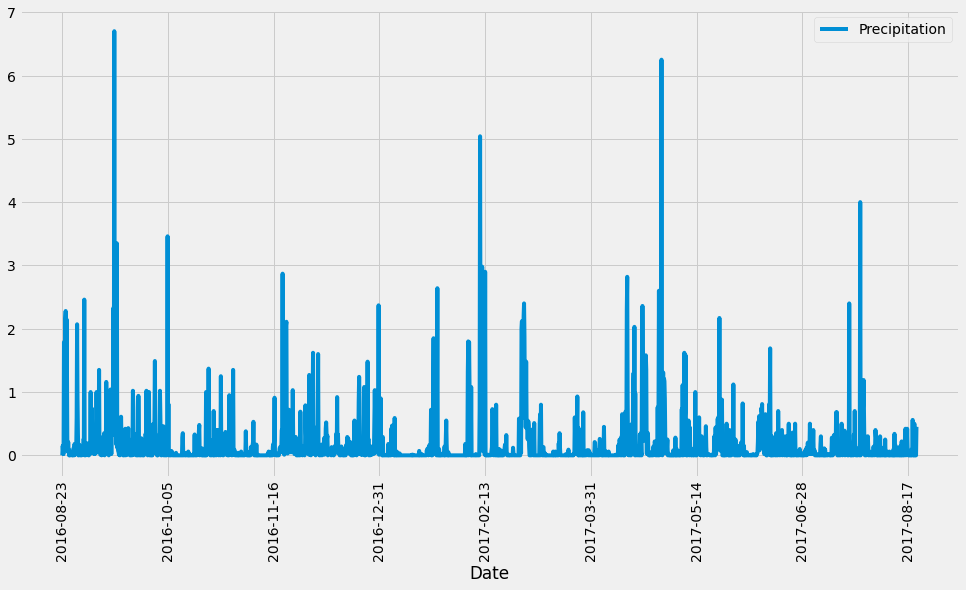

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data
results.plot(figsize = (15,8))
plt.xticks(rotation =90)


In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
results.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# Design a query to show how many stations are available in this dataset?
number_stations = session.query(func.count(Stations.station)).one()
number_stations

(9)

In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
max_stations = session.query(Measurements.station,func.count(Measurements.station)).group_by(Measurements.station).\
order_by(func.count(Measurements.station).desc()).all()
max_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active = 'USC00519281'
temp_info = session.query(func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)).\
filter(Measurements.station == most_active).all()

temp_info

[(54.0, 71.66378066378067, 85.0)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1233b5668>]],
      dtype=object)

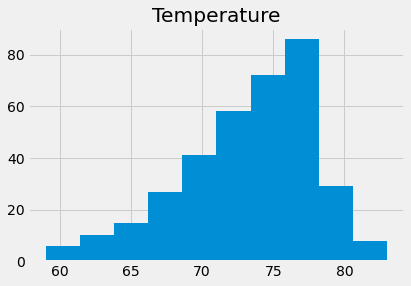

In [15]:
# Choose the station with the highest number of temperature observations.
highest_temp = session.query(Measurements.station, Measurements.tobs).filter(Measurements.station == most_active).\
filter(Measurements.date >= previous_date).all()
highest_temp
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_df = pd.DataFrame(highest_temp, columns = ["Station","Temperature"])
temp_df

temp_df.hist()

## Bonus Challenge Assignment

In [8]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

# function usage example


In [7]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [6]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [5]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


In [4]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)


In [3]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [2]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [1]:
# Plot the daily normals as an area plot with `stacked=False`
